# Árvores II - Tarefa I

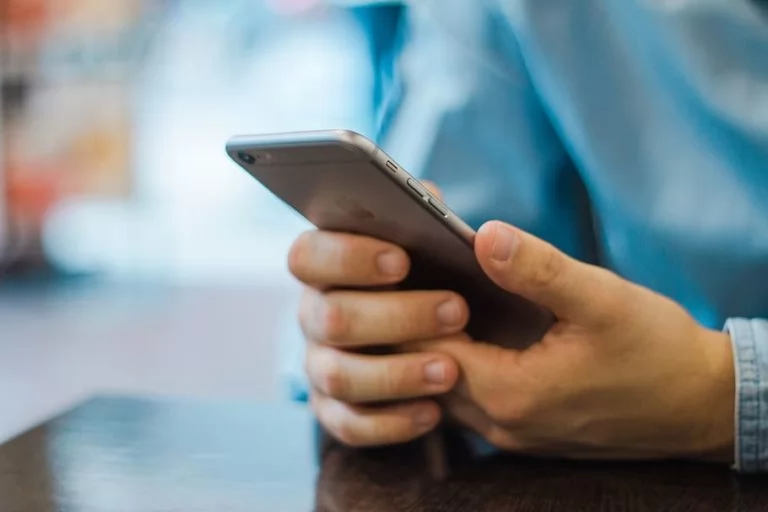  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [2]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [3]:
# Carrega a base "features.txt" em uma Series 
# são os nomes das variáveis em uma única coluna


# Ler o arquivo linha por linha
with open('./input/features.txt', 'r') as file:
    nomes_colunas = file.read().splitlines()

# Criar a Series a partir da lista de linhas
features = pd.Series(nomes_colunas)

# Exibe a quantidade de linhas e colunas
print(f'A quantidade de linhas: {features.shape}')

# Exibe as primeiras linhas da Series
print(features.head())


A quantidade de linhas: (561,)
0    1 tBodyAcc-mean()-X
1    2 tBodyAcc-mean()-Y
2    3 tBodyAcc-mean()-Z
3     4 tBodyAcc-std()-X
4     5 tBodyAcc-std()-Y
dtype: object


In [4]:
# Carrega a base "subject_train.txt" em uma Series 


# Ler o arquivo linha por linha
with open('./input/subject_train.txt', 'r') as file:
    lines = file.read().splitlines()

# Criar a Series a partir da lista de linhas
subject_train = pd.Series(lines)

# verificar número de linhas e de colunas
print('linhas:' , subject_train.shape)

# Exibir as primeiras linhas para verificar
print(subject_train.head())

linhas: (7352,)
0    1
1    1
2    1
3    1
4    1
dtype: object


In [5]:
# Carrega a base "X_train.txt" como dataframe
# registro das 561 variáveis para os 30 indivíduos

with open('./input/X_train.txt', 'r') as file:
    lines = file.readlines()

# Separa os valores de cada linha e cria uma lista de listas
data = [list(map(float, line.strip().split())) for line in lines]

# Cria o DataFrame pandas
X_train = pd.DataFrame(data)

# Visualiza as primeiras linhas do DataFrame
print('Linhas:', X_train.shape[0])
print('Colunas:', X_train.shape[1])

Linhas: 7352
Colunas: 561


In [6]:
# Faça com que as colunas deste dataframe tenham os nomes indicados em features.txt
# Se as dimensões forem compatíveis, definir os nomes das colunas de X_train

if len(features) == X_train.shape[1]:
    X_train.columns = features
    print("Nomes das colunas de X_train atualizados com sucesso!")
    print("Linhas e colunas:", X_train.shape)
    print("---------------------------------------------------------------------")
    print(X_train.head(1))
else:
    print("Erro: As dimensões não são compatíveis.")

Nomes das colunas de X_train atualizados com sucesso!
Linhas e colunas: (7352, 561)
---------------------------------------------------------------------
   1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0             0.288585            -0.020294            -0.132905   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.995279           -0.983111           -0.913526   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  \
0           -0.995112           -0.983185           -0.923527   

   10 tBodyAcc-max()-X  ...  552 fBodyBodyGyroJerkMag-meanFreq()  \
0            -0.934724  ...                            -0.074323   

   553 fBodyBodyGyroJerkMag-skewness()  554 fBodyBodyGyroJerkMag-kurtosis()  \
0                            -0.298676                            -0.710304   

   555 angle(tBodyAccMean,gravity)  556 angle(tBodyAccJerkMean),gravityMean)  \
0                        -0.112754                                    0

In [7]:
# Adicionando cabeçalho "id_individuo" em "subject_train"

subject_train = pd.DataFrame(subject_train.values, columns=['id_individuo'])

# verificando se realmente o cabeçalho foi inserido
print(subject_train.head())

  id_individuo
0            1
1            1
2            1
3            1
4            1


In [8]:
# Mesclando os DataFrames

X_train = pd.concat([X_train, subject_train], axis=1)

# verificando se realmente o cabeçalho foi inserido
print(X_train.head(1))

   1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0             0.288585            -0.020294            -0.132905   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.995279           -0.983111           -0.913526   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  \
0           -0.995112           -0.983185           -0.923527   

   10 tBodyAcc-max()-X  ...  553 fBodyBodyGyroJerkMag-skewness()  \
0            -0.934724  ...                            -0.298676   

   554 fBodyBodyGyroJerkMag-kurtosis()  555 angle(tBodyAccMean,gravity)  \
0                            -0.710304                        -0.112754   

   556 angle(tBodyAccJerkMean),gravityMean)  \
0                                    0.0304   

   557 angle(tBodyGyroMean,gravityMean)  \
0                             -0.464761   

   558 angle(tBodyGyroJerkMean,gravityMean)  559 angle(X,gravityMean)  \
0                                 -0.018446               

In [9]:
# Reordenando as colunas

# Obtendo o nome da última coluna
last_column = X_train.columns[-1]

# Movendo a última coluna para a primeira posição
X_train = X_train[[last_column] + [col for col in X_train if col != last_column]]

# verificando se realmente o cabeçalho foi inserido
print(X_train.head(1))

  id_individuo  1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0            1             0.288585            -0.020294            -0.132905   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.995279           -0.983111           -0.913526   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  ...  \
0           -0.995112           -0.983185           -0.923527  ...   

   552 fBodyBodyGyroJerkMag-meanFreq()  553 fBodyBodyGyroJerkMag-skewness()  \
0                            -0.074323                            -0.298676   

   554 fBodyBodyGyroJerkMag-kurtosis()  555 angle(tBodyAccMean,gravity)  \
0                            -0.710304                        -0.112754   

   556 angle(tBodyAccJerkMean),gravityMean)  \
0                                    0.0304   

   557 angle(tBodyGyroMean,gravityMean)  \
0                             -0.464761   

   558 angle(tBodyGyroJerkMean,gravityMean)  559 angle(X,gravityMean)  \


In [10]:
# Carrega a base "y_train.txt" em uma Series 


# Ler o arquivo linha por linha
with open('./input/y_train.txt', 'r') as file:
    nomes_colunas = file.read().splitlines()

# Criar a Series a partir da lista de linhas
y_train = pd.Series(nomes_colunas)

# Exibe a quantidade de linhas e colunas
print(f'A quantidade de linhas: {y_train.shape}')

# Exibe as primeiras linhas da Series
print(y_train.head())

A quantidade de linhas: (7352,)
0    5
1    5
2    5
3    5
4    5
dtype: object


In [11]:
# Adicionando cabeçalho "id_atividade" em "y_train"

y_train = pd.DataFrame(y_train.values, columns=['id_atividade'])

# verificando se realmente o cabeçalho foi inserido
print(y_train.head())

  id_atividade
0            5
1            5
2            5
3            5
4            5


In [12]:
# Mesclando os DataFrames

X_train = pd.concat([X_train, y_train], axis=1)

# verificando se realmente o cabeçalho foi inserido
print(X_train.head(1))

  id_individuo  1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0            1             0.288585            -0.020294            -0.132905   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.995279           -0.983111           -0.913526   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  ...  \
0           -0.995112           -0.983185           -0.923527  ...   

   553 fBodyBodyGyroJerkMag-skewness()  554 fBodyBodyGyroJerkMag-kurtosis()  \
0                            -0.298676                            -0.710304   

   555 angle(tBodyAccMean,gravity)  556 angle(tBodyAccJerkMean),gravityMean)  \
0                        -0.112754                                    0.0304   

   557 angle(tBodyGyroMean,gravityMean)  \
0                             -0.464761   

   558 angle(tBodyGyroJerkMean,gravityMean)  559 angle(X,gravityMean)  \
0                                 -0.018446                 -0.841247   

   560 angl

In [13]:
# Criando um índice duplo composto pela ordem dos dados e pelo id_individuo

X_train = X_train.set_index([X_train.index, 'id_individuo'])


In [14]:
# Salvando o DataFrame em um arquivo CSV com todas as colunas

try:
    X_train.to_csv('./input/X_train.csv')
    print("DataFrame 'X_train' salvo com sucesso na pasta 'input/' com o nome de 'X_train.csv'")
except Exception as e:
    print("Ocorreu um erro ao tentar salvar o DataFrame:", e)
    

DataFrame 'X_train' salvo com sucesso na pasta 'input/' com o nome de 'X_train.csv'


In [15]:
# Carrega a base "subject_test.txt" em uma Series 


# Ler o arquivo linha por linha
with open('./input/subject_test.txt', 'r') as file:
    lines = file.read().splitlines()

# Criar a Series a partir da lista de linhas
subject_test = pd.Series(lines)

# verificar número de linhas e de colunas
print('linhas:' , subject_test.shape)
print('-------------------------------------------------------------------')

# Exibir as primeiras linhas para verificar
print('linhas:', subject_test.head())

linhas: (2947,)
-------------------------------------------------------------------
linhas: 0    2
1    2
2    2
3    2
4    2
dtype: object


In [16]:
# Carrega a base "X_test.txt" como dataframe

with open('./input/X_test.txt', 'r') as file:
    lines = file.readlines()

# Separa os valores de cada linha e cria uma lista de listas
data = [list(map(float, line.strip().split())) for line in lines]

# Cria o DataFrame pandas
X_test = pd.DataFrame(data)

# Visualiza as primeiras linhas do DataFrame
print('Linhas:', X_test.shape[0])
print('Colunas:', X_test.shape[1])

Linhas: 2947
Colunas: 561


In [17]:
# Faça com que as colunas deste dataframe tenham os nomes indicados em 'features.txt'
# Se as dimensões forem compatíveis, definir os nomes das colunas de 'X_test'

if len(features) == X_test.shape[1]:
    X_test.columns = features
    print("Nomes das colunas de 'X_test' atualizados com sucesso!")
    print("Linhas e colunas:", X_test.shape)
    print("---------------------------------------------------------------------")
    print(X_test.head(1))
else:
    print("Erro: As dimensões não são compatíveis.")

Nomes das colunas de 'X_test' atualizados com sucesso!
Linhas e colunas: (2947, 561)
---------------------------------------------------------------------
   1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0             0.257178            -0.023285            -0.014654   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.938404           -0.920091           -0.667683   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  \
0           -0.952501           -0.925249           -0.674302   

   10 tBodyAcc-max()-X  ...  552 fBodyBodyGyroJerkMag-meanFreq()  \
0            -0.894088  ...                             0.071645   

   553 fBodyBodyGyroJerkMag-skewness()  554 fBodyBodyGyroJerkMag-kurtosis()  \
0                             -0.33037                            -0.705974   

   555 angle(tBodyAccMean,gravity)  556 angle(tBodyAccJerkMean),gravityMean)  \
0                         0.006462                                   0

In [18]:
# Adicionando cabeçalho "id_individuo" em "subject_test"

subject_test = pd.DataFrame(subject_test.values, columns=['id_individuo'])

# verificando se realmente o cabeçalho foi inserido
print(subject_test.head())

  id_individuo
0            2
1            2
2            2
3            2
4            2


In [19]:
# Mesclando os DataFrames

X_test = pd.concat([X_test, subject_test], axis=1)

# verificando se realmente o cabeçalho foi inserido
print(X_test.head(1))

   1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0             0.257178            -0.023285            -0.014654   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.938404           -0.920091           -0.667683   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  \
0           -0.952501           -0.925249           -0.674302   

   10 tBodyAcc-max()-X  ...  553 fBodyBodyGyroJerkMag-skewness()  \
0            -0.894088  ...                             -0.33037   

   554 fBodyBodyGyroJerkMag-kurtosis()  555 angle(tBodyAccMean,gravity)  \
0                            -0.705974                         0.006462   

   556 angle(tBodyAccJerkMean),gravityMean)  \
0                                   0.16292   

   557 angle(tBodyGyroMean,gravityMean)  \
0                             -0.825886   

   558 angle(tBodyGyroJerkMean,gravityMean)  559 angle(X,gravityMean)  \
0                                  0.271151               

In [20]:
# Reordenando as colunas

# Obtendo o nome da última coluna
last_column = X_test.columns[-1]

# Movendo a última coluna para a primeira posição
X_test = X_test[[last_column] + [col for col in X_test if col != last_column]]

# verificando se realmente o cabeçalho foi inserido
print(X_test.head(5))

  id_individuo  1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
0            2             0.257178            -0.023285            -0.014654   
1            2             0.286027            -0.013163            -0.119083   
2            2             0.275485            -0.026050            -0.118152   
3            2             0.270298            -0.032614            -0.117520   
4            2             0.274833            -0.027848            -0.129527   

   4 tBodyAcc-std()-X  5 tBodyAcc-std()-Y  6 tBodyAcc-std()-Z  \
0           -0.938404           -0.920091           -0.667683   
1           -0.975415           -0.967458           -0.944958   
2           -0.993819           -0.969926           -0.962748   
3           -0.994743           -0.973268           -0.967091   
4           -0.993852           -0.967445           -0.978295   

   7 tBodyAcc-mad()-X  8 tBodyAcc-mad()-Y  9 tBodyAcc-mad()-Z  ...  \
0           -0.952501           -0.925249           

In [21]:
# Criando um índice duplo composto pela ordem dos dados e pelo 'id_individuo'

X_test = X_test.set_index([X_test.index, 'id_individuo'])

In [22]:
# Salvando o DataFrame em um arquivo CSV com todas as colunas

X_test.to_csv('./input/X_test.csv')
print("DataFrame 'X_test' salvo com sucesso na pasta 'input/' com o nome de  'X_test.csv'")

DataFrame 'X_test' salvo com sucesso na pasta 'input/' com o nome de  'X_test.csv'


In [23]:
# Selecionar as 4 primeiras colunas e a última coluna - X_train
selected_columns = list(X_train.columns[:3]) + [X_train.columns[-1]]
X_train_selected = X_train[selected_columns]


# Selecionar as 4 primeiras colunas e a última coluna - X_test
selected_columns = list(X_test.columns[:3]) + [X_test.columns[-1]]
X_test_selected = X_test[selected_columns]


In [24]:
X_train_selected


1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
     id_individuo                                             
0    1                        0.288585            -0.020294   
1    1                        0.278419            -0.016411   
2    1                        0.279653            -0.019467   
3    1                        0.279174            -0.026201   
4    1                        0.276629            -0.016570   
...                                ...                  ...   
7347 30                       0.299665            -0.057193   
7348 30                       0.273853            -0.007749   
7349 30                       0.273387            -0.017011   
7350 30                       0.289654            -0.018843   
7351 30                       0.351503            -0.012423   

                   3 tBodyAcc-mean()-Z id_atividade  
     id_individuo                                    
0    1                       -0.132905            5  
1    1                       -0.123520            5  
2    1                       -0.113462            5  
3    1                       -0.123283            5  
4    1                       -0.115362            5  
...                                ...          ...  
7347 30                      -0.181233            2  
7348 30                      -0.147468            2  
7349 30                      -0.045022            2  
7350 30                      -0.158281            2  
7351 30                      -0.203867            2  

[7352 rows x 4 columns]

In [25]:
X_test_selected

1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  \
     id_individuo                                             
0    2                        0.257178            -0.023285   
1    2                        0.286027            -0.013163   
2    2                        0.275485            -0.026050   
3    2                        0.270298            -0.032614   
4    2                        0.274833            -0.027848   
...                                ...                  ...   
2942 24                       0.310155            -0.053391   
2943 24                       0.363385            -0.039214   
2944 24                       0.349966             0.030077   
2945 24                       0.237594             0.018467   
2946 24                       0.153627            -0.018437   

                   3 tBodyAcc-mean()-Z  561 angle(Z,gravityMean)  
     id_individuo                                                 
0    2                       -0.014654                 -0.057978  
1    2                       -0.119083                 -0.083898  
2    2                       -0.118152                 -0.079346  
3    2                       -0.117520                 -0.077108  
4    2                       -0.129527                 -0.073857  
...                                ...                       ...  
2942 24                      -0.099109                  0.184784  
2943 24                      -0.105915                  0.182412  
2944 24                      -0.115788                  0.181184  
2945 24                      -0.096499                  0.187563  
2946 24                      -0.137018                  0.188103  

[2947 rows x 4 columns]

In [26]:

X_train_selected.to_csv('./input/X_train_subset.csv')
print("DataFrame 'X_train_subset' salvo com sucesso na pasta 'input/' com o nome de  'X_train_subset.csv'")
print('------------------------------------------------------------------------------------------')
print(X_train_selected.head(1))

print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------')

X_test_selected.to_csv('./input/X_test_subset.csv')
print("DataFrame 'X_test_subset' salvo com sucesso na pasta 'input/' com o nome de  'X_test_subset.csv'")
print('------------------------------------------------------------------------------------------')
print(X_test_selected.head(1))

DataFrame 'X_train_subset' salvo com sucesso na pasta 'input/' com o nome de  'X_train_subset.csv'
------------------------------------------------------------------------------------------
                1 tBodyAcc-mean()-X  2 tBodyAcc-mean()-Y  3 tBodyAcc-mean()-Z  \
  id_individuo                                                                  
0 1                        0.288585            -0.020294            -0.132905   

               id_atividade  
  id_individuo               
0 1                       5  
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
DataFrame 'X_test_subset' salvo com sucesso na pasta 'input/' com o nome de  'X_test_subset.csv'
------------------------------------------------------------------------------------------
               

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [27]:
# Carregar arquivo "X_train_subset.csv"
X_train_subset = pd.read_csv('./input/X_train_subset.csv')

# Verificar o nome das colunas no DataFrame
print(X_train_subset.columns)
# X_train_subset.progress_apply(lambda x: pd.to_datetime(x), axis=1) # linhas

Index(['Unnamed: 0', 'id_individuo', '1 tBodyAcc-mean()-X',
       '2 tBodyAcc-mean()-Y', '3 tBodyAcc-mean()-Z', 'id_atividade'],
      dtype='object')


In [28]:
# Carregar arquivo "X_train_subset.cvs"

X = X_train_subset.drop(columns=['id_atividade'])
y = X_train_subset['id_atividade']

X_train, X_test, y_train, y_test = train_test_split(X, y)




In [29]:
y_train.value_counts()


id_atividade
6    1051
5    1020
4     969
1     917
2     809
3     748
Name: count, dtype: int64

In [30]:
# árvore feita na base de treino com profundidade 20 

clf = DecisionTreeClassifier(random_state=2360873, max_depth=20).fit(X_train, y_train)


In [31]:
# instalar o programa -- https://graphviz.org/download/ --
# optar por adicionar a variável de ambiente no PATH do Windows
# pip install graphviz

import graphviz
from sklearn.tree import export_graphviz
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['1', '2', '3', '4', '5', '6'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph



In [32]:
# Criar o caminho de poda pelo custo de complexidade

caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

# Selecionar apenas 1 a cada 5 valores de ccp_alpha
ccp_alphas = ccp_alphas[::5]

# Exibir os valores de ccp_alpha
print(ccp_alphas)

[0.         0.00013602 0.00013602 0.00013602 0.00014509 0.00014509
 0.00014509 0.00014509 0.00014735 0.00015113 0.00015113 0.00015545
 0.00015545 0.00015545 0.00015545 0.00015869 0.00015869 0.00015982
 0.00016121 0.00016193 0.00016322 0.00016487 0.00016487 0.00016624
 0.00016624 0.00016624 0.00016741 0.00016927 0.00017128 0.00017272
 0.00017562 0.00017758 0.00017998 0.00018136 0.00018136 0.00018136
 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136
 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136
 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136
 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136 0.00018136
 0.00018807 0.00020403 0.00020957 0.00021158 0.00021158 0.00021662
 0.00021763 0.00021763 0.00021763 0.00021763 0.00021763 0.00021804
 0.00022418 0.0002267  0.00022972 0.00022972 0.00022972 0.00023317
 0.00023576 0.00023803 0.00024071 0.00024181 0.00024181 0.00024181
 0.00024181 0.00024181 0.00024181 0.00024181 0.00024181 0.0002

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [37]:
# guarda em lista das árvores 
# fit na base de treino

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

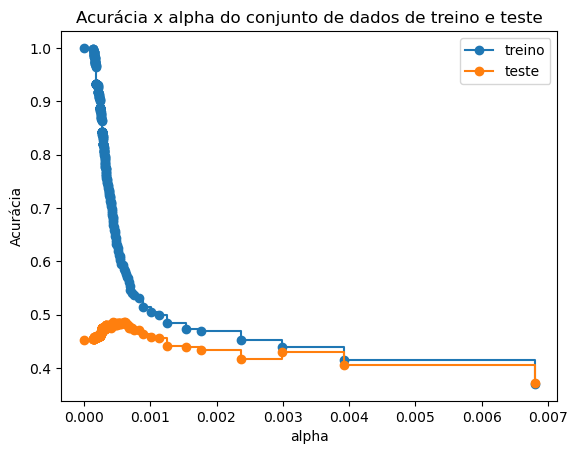

In [38]:
# aplicando função -- clf.score -- retorna as acurácias para treino e teste

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [35]:
# melhor árvore -- 
# tests_scores -- tem as acurácias na base de teste 
# [::-1]  -- ordena de trás para frente
# index(max(test_scores)) pega o índice máximo
# pega a melhor acurácia da deireita para a esquerda

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore


DecisionTreeClassifier(ccp_alpha=0.000600949648827777, random_state=2360873)

A acurácia:  48.69


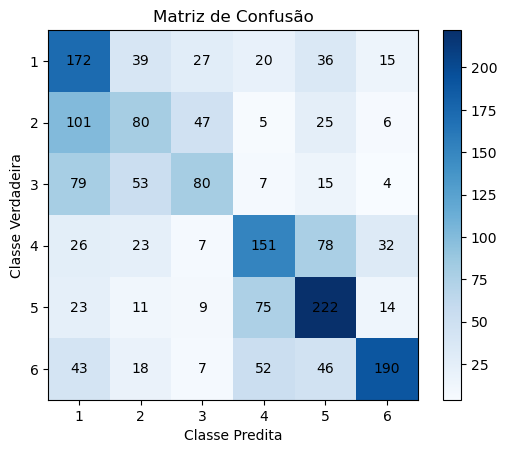

In [39]:
from sklearn.metrics import confusion_matrix

acuracia_teste = melhor_arvore.score(X_test, y_test)
print(f'A acurácia: {acuracia_teste * 100: .2f}')

# Previsões da melhor árvore nos dados de teste
previsoes = melhor_arvore.predict(X_test)

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão
plt.imshow(matriz_confusao, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

# Definindo os rótulos dos eixos
classes = [str(c) for c in melhor_arvore.classes_]  # Obtendo os rótulos de classe
plt.xticks(ticks=range(len(classes)), labels=classes)
plt.yticks(ticks=range(len(classes)), labels=classes)

# Adicionando os valores das células
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()
